In [1]:
'''import applicable modules and set plot style'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import math
# import datetime
# %matplotlib inline
sns.set_style('darkgrid')

In [2]:
'''import the data'''

circuits_df = pd.read_csv('circuits.csv')
constructor_results_df = pd.read_csv('constructor_results.csv')
constructor_standings_df = pd.read_csv('constructor_standings.csv')
constructors_df = pd.read_csv('constructors.csv')
driver_standings_df = pd.read_csv('driver_standings.csv')
drivers_df = pd.read_csv('drivers.csv')
lap_times_df = pd.read_csv('lap_times.csv')
pit_stops_df = pd.read_csv('pit_stops.csv')
qualifying_df = pd.read_csv('qualifying.csv')
races_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
seasons_df = pd.read_csv('seasons.csv')
sprint_results_df = pd.read_csv('sprint_results.csv')
status_df = pd.read_csv('status.csv')

# Most Successful Teams

In [3]:
merge1 = constructor_standings_df.merge(races_df, on='raceId', how='left', suffixes=('_c_s','_r'))
merge2 = merge1.merge(constructors_df, on='constructorId', how='left', suffixes=(None,'_co'))
df = merge2.merge(circuits_df, on='circuitId', how='left', suffixes=(None,'_ci'))

In [4]:
# replace /N with NaN
df.replace('\\N',None, inplace=True)

In [5]:
df.columns

Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins', 'year', 'round', 'circuitId',
       'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'constructorRef', 'name_co',
       'nationality', 'url_co', 'circuitRef', 'name_ci', 'location', 'country',
       'lat', 'lng', 'alt', 'url_ci'],
      dtype='object')

In [6]:
# drop unwanted columns
cols_to_drop = ['time', 'url', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'url_co', 'url_ci']
df.drop(cols_to_drop, axis=1, inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
constructorStandingsId,12931.0,16564.665996,8739.173340,1.0000,8768.50000,20119.0000,24584.5000,28402.0000
raceId,12931.0,514.554095,292.222557,1.0000,294.00000,493.0000,714.0000,1096.0000
constructorId,12931.0,48.033795,59.358214,1.0000,6.00000,25.0000,57.0000,214.0000
points,12931.0,33.802606,76.899408,0.0000,0.00000,6.0000,31.0000,765.0000
position,12931.0,7.287449,4.387007,1.0000,4.00000,7.0000,10.0000,22.0000
wins,12931.0,0.679452,1.819341,0.0000,0.00000,0.0000,0.0000,19.0000
year,12931.0,1991.757095,17.354370,1958.0000,1978.00000,1990.0000,2007.0000,2022.0000
round,12931.0,8.767071,4.897846,1.0000,5.00000,8.0000,13.0000,22.0000
circuitId,12931.0,23.871472,18.517959,1.0000,9.00000,18.0000,36.0000,79.0000
lat,12931.0,34.217671,24.937281,-37.8497,34.84310,43.9975,47.5789,57.2653


In [8]:
# sort values
df = df.sort_values(by=['constructorId', 'year', 'round'])
df

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,round,circuitId,...,constructorRef,name_co,nationality,circuitRef,name_ci,location,country,lat,lng,alt
9603,21034,674,1,0.0,14,14,0,1968,8,20,...,mclaren,McLaren,British,nurburgring,Nürburgring,Nürburg,Germany,50.3356,6.94750,578
9597,21051,675,1,0.0,14,14,0,1968,9,14,...,mclaren,McLaren,British,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162
9591,21068,676,1,0.0,14,14,0,1968,10,52,...,mclaren,McLaren,British,tremblant,Circuit Mont-Tremblant,Quebec,Canada,46.1877,-74.60990,214
9585,21085,677,1,0.0,14,14,0,1968,11,46,...,mclaren,McLaren,British,watkins_glen,Watkins Glen,New York State,USA,42.3369,-76.92720,485
9579,21102,678,1,0.0,14,14,0,1968,12,32,...,mclaren,McLaren,British,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,Mexico,19.4042,-99.09070,2227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12888,28327,1092,214,143.0,4,4,0,2022,18,22,...,alpine,Alpine F1 Team,French,suzuka,Suzuka Circuit,Suzuka,Japan,34.8431,136.54100,45
12893,28367,1093,214,149.0,4,4,0,2022,19,69,...,alpine,Alpine F1 Team,French,americas,Circuit of the Americas,Austin,USA,30.1328,-97.64110,161
12907,28377,1094,214,153.0,4,4,0,2022,20,32,...,alpine,Alpine F1 Team,French,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,Mexico,19.4042,-99.09070,2227
12915,28387,1095,214,167.0,4,4,0,2022,21,18,...,alpine,Alpine F1 Team,French,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil,-23.7036,-46.69970,785


In [9]:
df['race_number'] = df.groupby('constructorId').cumcount()+1
df['season_number'] = df.groupby(['constructorId', 'year']).ngroup()+1

In [10]:
# add column indicating number of rounds each year
df['total_rounds'] = df.groupby('year')['round'].transform('max')

In [11]:
# add boolean column to determine indicate if this is the final round of that year
df['is_final_round'] = df['round'] == df['total_rounds']

# add column that includes a 1 indicating the team finished first place in the final round
# this will be used to find a cumulative total of championships
df['is_champ'] = np.where((df['is_final_round']) & (df['position'] == 1), 1, 0)

In [14]:
# add column to calculate a cumulative total of championships
df['cum_champs'] = df.groupby('constructorId')['is_champ'].cumsum()

In [23]:
# add column that indicates the total number of championships each team has one in hisotry
df['total_champs'] = df.groupby('constructorId')['cum_champs'].transform('max')

In [39]:
# subset data to only contain final standings
df_final = df.loc[df['is_final_round']]

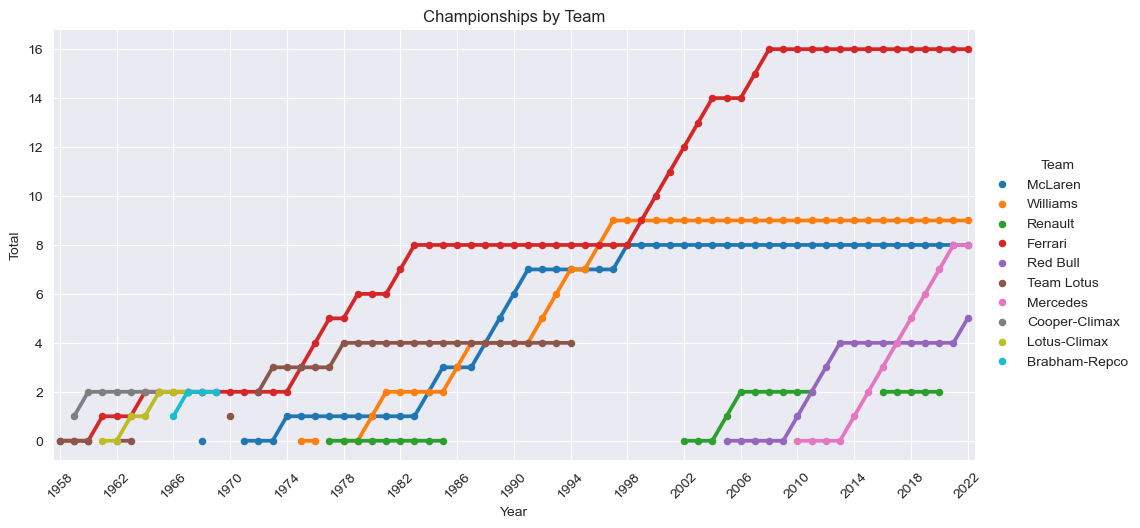

In [58]:
fig = sns.catplot(data=df_final.loc[df_final['total_champs'] > 1], legend=False, kind='point', x='year', hue='name_co', y='cum_champs', markers='.', aspect=2)
fig.add_legend(title='Team')
fig.set(title='Championships by Team')
fig.set_axis_labels('Year', 'Total')
fig.set_xticklabels(step=4, rotation=45)
fig.ax.grid(color='white')
plt.show()

In [211]:
# subset data by winning constructors only
df_con_champs = df_finalround.loc[df.position==1]
df['championship_number'] = df_con_champs.groupby('constructorId').cumcount()+1

In [212]:
df_con_champs

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,year,round,circuitId,name,date,constructorRef,name_co,nationality,circuitRef,name_ci,location,country,lat,lng,alt,race_number,season_number,total_rounds,is_final_round
7963,22438,604,1,73.0,1,1,4,1974,15,46,United States Grand Prix,1974-10-06,mclaren,McLaren,British,watkins_glen,Watkins Glen,New York State,USA,42.3369,-76.92720,485,58,5,15,True
5482,10467,451,1,143.5,1,1,12,1984,16,27,Portuguese Grand Prix,1984-10-21,mclaren,McLaren,British,estoril,Autódromo do Estoril,Estoril,Portugal,38.7506,-9.39417,130,212,15,16,True
5242,10197,435,1,90.0,1,1,6,1985,16,29,Australian Grand Prix,1985-11-03,mclaren,McLaren,British,adelaide,Adelaide Street Circuit,Adelaide,Australia,-34.9272,138.61700,58,228,16,16,True
4528,9422,387,1,199.0,1,1,15,1988,16,29,Australian Grand Prix,1988-11-13,mclaren,McLaren,British,adelaide,Adelaide Street Circuit,Adelaide,Australia,-34.9272,138.61700,58,276,19,16,True
4219,9133,371,1,141.0,1,1,10,1989,16,29,Australian Grand Prix,1989-11-05,mclaren,McLaren,British,adelaide,Adelaide Street Circuit,Adelaide,Australia,-34.9272,138.61700,58,292,20,16,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9771,20495,708,172,54.0,1,1,6,1965,10,32,Mexican Grand Prix,1965-10-24,lotus-climax,Lotus-Climax,British,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,Mexico,19.4042,-99.09070,2227,47,798,10,True
8599,21086,678,180,62.0,1,1,5,1968,12,32,Mexican Grand Prix,1968-11-03,lotus-ford,Lotus-Ford,British,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,Mexico,19.4042,-99.09070,2227,32,820,12,True
9706,20720,698,191,42.0,1,1,4,1966,9,32,Mexican Grand Prix,1966-10-23,brabham-repco,Brabham-Repco,British,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,Mexico,19.4042,-99.09070,2227,9,853,9,True
8715,20897,689,191,63.0,1,1,4,1967,11,32,Mexican Grand Prix,1967-10-22,brabham-repco,Brabham-Repco,British,rodriguez,Autódromo Hermanos Rodríguez,Mexico City,Mexico,19.4042,-99.09070,2227,20,854,11,True


In [93]:
df.constructorId.nunique()

159

In [110]:
races_df.loc[races_df.raceId == 674]

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
673,674,1968,8,20,German Grand Prix,1968-08-04,\N,http://en.wikipedia.org/wiki/1968_German_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [109]:
constructors_df.loc[constructors_df.constructorId==1]

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


Full outer exclusion join example code

In [ ]:
merge1 = constructor_standings_df.merge(constructor_results_df, on=['raceId','constructorId'], how='outer', indicator=True)\
.query('_merge != "both"').drop('_merge', 1)